In [1]:
from pathlib import Path

In [2]:
from docling.backend.docling_parse_backend import DoclingParseDocumentBackend
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    EasyOcrOptions,
    OcrMacOptions,
    PdfPipelineOptions,
    RapidOcrOptions,
    TesseractCliOcrOptions,
    TesseractOcrOptions,
    AcceleratorOptions,
    AcceleratorDevice
)
from docling.datamodel.settings import settings
from docling.document_converter import DocumentConverter, PdfFormatOption

/home/alexandre_pantalena/desenvolvimento/repos/langchain/langchain_venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
do_ocr: bool = False
do_table_structure: bool = True
generate_page_images: bool = True
generate_picture_images: bool = True

accelerator_options = AcceleratorOptions(
    num_threads=8, device=AcceleratorDevice.CPU
)

do_cell_matching: bool = True

pipeline_options = PdfPipelineOptions(
    do_ocr=do_ocr,
    do_table_structure=do_table_structure,
    generate_page_images=generate_page_images,
    generate_picture_images=generate_picture_images,
    accelerator_options = accelerator_options,
)
pipeline_options.table_structure_options.do_cell_matching = do_cell_matching

force_full_page_ocr: bool = True

# Any of the OCR options can be used:EasyOcrOptions, TesseractOcrOptions, TesseractCliOcrOptions, OcrMacOptions(Mac only), RapidOcrOptions
# ocr_options = EasyOcrOptions(force_full_page_ocr=force_full_page_ocr)
# ocr_options = TesseractOcrOptions(force_full_page_ocr=force_full_page_ocr)
# ocr_options = OcrMacOptions(force_full_page_ocr=force_full_page_ocr)
# ocr_options = RapidOcrOptions(force_full_page_ocr=force_full_page_ocr)
ocr_options = TesseractCliOcrOptions(force_full_page_ocr=force_full_page_ocr, lang=["Latin"])
pipeline_options.ocr_options = ocr_options

# Enable the profiling to measure the time spent
settings.debug.profile_pipeline_timings = True

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

In [10]:
def parse(file):
    input_doc = Path(file)

    conversion_result = doc_converter.convert(input_doc)
    doc = conversion_result.document

    doc_conversion_secs = conversion_result.timings["pipeline_total"].times
    print(f"Conversion secs: {doc_conversion_secs}")
    md = doc.export_to_markdown()

    screenshots = [doc.pages[p].image.pil_image for p in doc.pages]
    images = [p.image.pil_image for p in doc.pictures]

    return md, screenshots, images

file = '../files/BRHBSCCRIAT5-ASS03022025V01-000830678.pdf'
text, screenshots, images = parse(file)

Conversion secs: [274.763006752999]


In [22]:
text

'<!-- image -->\n\n## HABITASEC SECURITIZADORA S.A. CNPJ nº 09.304.427/0001-58 NIRE 35.300.352.068\n\n## ATA DA ASSEMBLEIA ESPECIAL DE TITULARES DOS CERTIFICADOS DE RECEBÍVEIS IMOBILIÁRIOS DA 1ª SÉRIE DA 48ª EMISSÃO DA HABITASEC SECURITIZADORA S.A., REALIZADA EM 03 DE FEVEREIRO DE 2025\n\n- 1. Data, Hora e Local da Reunião: na data de 03 de fevereiro de 2025, as 10:00 horas, de forma exclusivamente digital, nos termos da Resolução da Comissão de Valores Mobiliários ( CVM ) n° 60, de 23 de dezembro de 2021, conforme alterada ( Resolução CVM 60 ) e demais normas aplicáveis de forma complementar, coordenada pela Habitasec Securitizadora S.A. ( Emissora ou Securitizadora ),  com  a  dispensa  de  videoconferência  em  razão  da  presença  da  totalidade  dos Titulares de CRI (termo abaixo definido).\n- 2. Mesa: Presidente: Cristiane Monique Araújo Martins ; Secretaria: Simone Santini .\n- 3. Convocação: dispensada a convocação por edital em razão da presença dos representantes que compõe 1

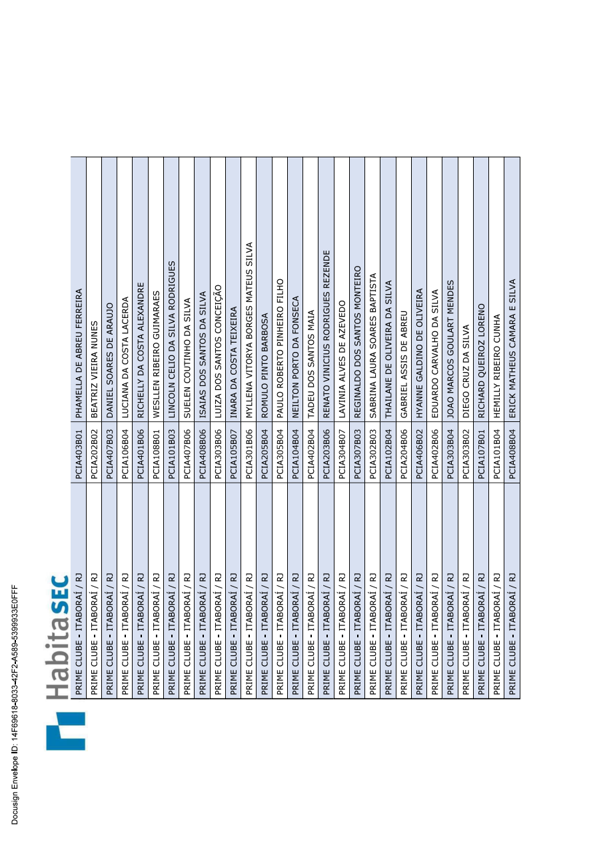

In [21]:
screenshots[-3]